In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic (1).csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

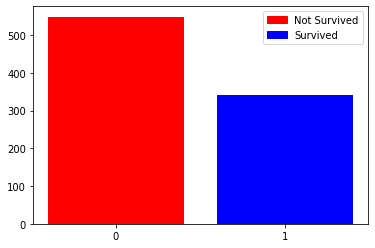

In [8]:
color={'Not Survived':'red','Survived':'blue'}
labels=list(color.keys())
plt.bar(list(('0','1')),df['Survived'].value_counts(),color=['Red','Blue'])
handles =[plt.Rectangle((0,0),1,1, color=color[label]) for label in labels]
plt.legend(handles,labels)
plt.show()

In [9]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
men=df.loc[df['Sex']=='male']['Survived']
men.head()
men.value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [11]:
women=df.loc[df['Sex']=='female']['Survived']
women.value_counts()

1    233
0     81
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Women Survival')

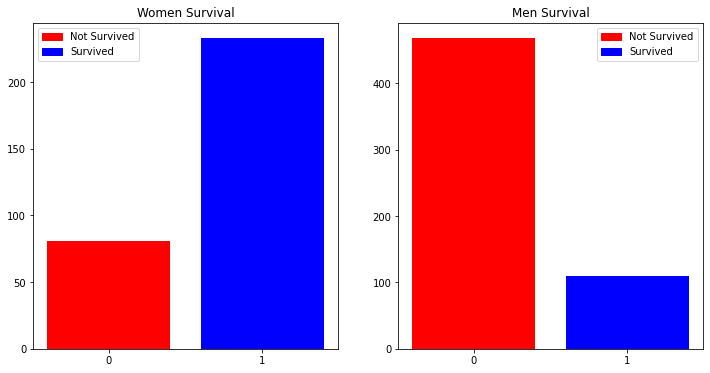

In [12]:
fig,(axes1,axes2)=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axes1.bar(list(('0','1')),list(women.value_counts().sort_values()),color=['Red','Blue'])
axes2.bar(list(('0','1')),list(men.value_counts()),color=['Red','Blue'])
axes1.legend(handles,labels)
axes2.legend(handles,labels)
axes2.set_title('Men Survival')
axes1.set_title('Women Survival')

In [13]:
print(f"Percentage of Men survived {round(((sum(men)/len(men))*100),2)}%")
print(f"Percentage of Women survived {round(((sum(women)/len(women))*100),2)}%")

Percentage of Men survived 18.89%
Percentage of Women survived 74.2%


In [14]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
class1=df.loc[df['Pclass']==1]['Survived']
class2=df.loc[df['Pclass']==2]['Survived']
class3=df.loc[df['Pclass']==3]['Survived']

Text(0.5, 1.0, '3rd class Survival')

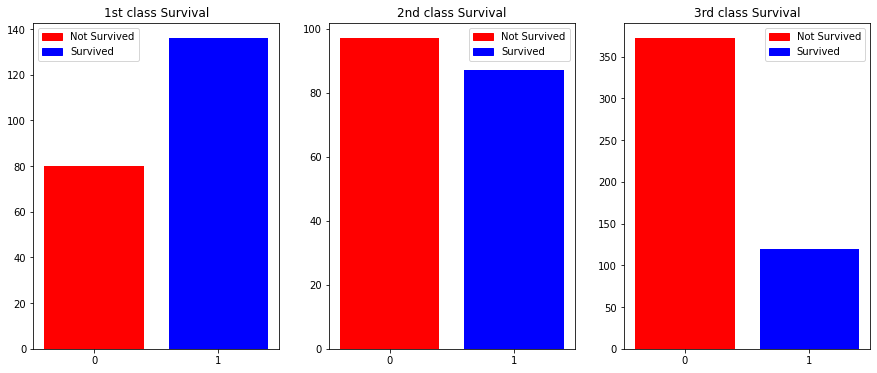

In [16]:
fig,(axes1,axes2,axes3)=plt.subplots(nrows=1,ncols=3,figsize=(15,6))
axes1.bar(list(('0','1')),list((class1.value_counts().sort_index())),color=['Red','Blue'])
axes2.bar(list(('0','1')),list((class2.value_counts().sort_index())),color=['Red','Blue'])
axes3.bar(list(('0','1')),list((class3.value_counts().sort_index())),color=['Red','Blue'])
axes1.legend(handles,labels)
axes2.legend(handles,labels)
axes3.legend(handles,labels)
axes1.set_title('1st class Survival')
axes2.set_title('2nd class Survival')
axes3.set_title('3rd class Survival')

In [17]:
print(f"Percentage of 1st class passengers Survived {round((sum(class1)/len(class1))*100,2)}%")
print(f"Percentage of 2nd class passengers Survived {round((sum(class2)/len(class2))*100,2)}%")
print(f"Percentage of 3rd class passengers Survived {round((sum(class3)/len(class3))*100,2)}%")

Percentage of 1st class passengers Survived 62.96%
Percentage of 2nd class passengers Survived 47.28%
Percentage of 3rd class passengers Survived 24.24%


In [51]:
child=df.loc[df['Age']<=16]['Survived']
Adult_m=df.loc[(df['Age']>=16) & (df['Age']<=50) & (df['Sex']=='male')]['Survived']
Adult_f=df.loc[(df['Age']>=16) & (df['Age']<=50) & (df['Sex']=='female')]['Survived']
senior=df.loc[df['Age']>50]['Survived']
child.value_counts()
Adult_m.value_counts()
Adult_f.value_counts()
senior.value_counts()

0    42
1    22
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Senior citizen Survival')

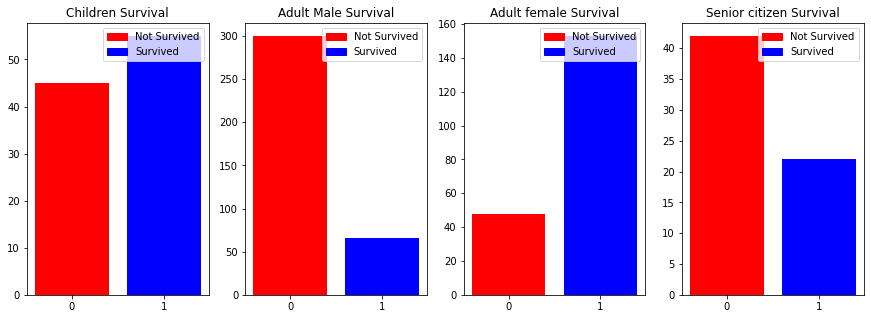

In [55]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(nrows=1,ncols=4,figsize=(15,5))
ax1.bar(list(('0','1')),child.value_counts().sort_index(),color=['Red','Blue'])
ax2.bar(list(('0','1')),Adult_m.value_counts().sort_index(),color=['Red','Blue'])
ax3.bar(list(('0','1')),Adult_f.value_counts().sort_index(),color=['Red','Blue'])
ax4.bar(list(('0','1')),senior.value_counts().sort_index(),color=['Red','Blue'])
ax1.legend(handles,labels)
ax2.legend(handles,labels)
ax3.legend(handles,labels)
ax4.legend(handles,labels)
ax1.set_title("Children Survival")
ax2.set_title("Adult Male Survival")
ax3.set_title("Adult female Survival")
ax4.set_title("Senior citizen Survival")

In [56]:
print(f"Percentage of children Survival {round((sum(child)/len(child))*100,1)}%")
print(f"Percentage of Adult Male Survival {round((sum(Adult_m)/len(Adult_m))*100,1)}%")
print(f"Percentage of Adult Female Survival {round((sum(Adult_f)/len(Adult_f))*100,1)}%")
print(f"Percentage of Senior Citizen Survival {round((sum(senior)/len(senior))*100,1)}%")

Percentage of children Survival 55.0%
Percentage of Adult Male Survival 18.0%
Percentage of Adult Female Survival 76.1%
Percentage of Senior Citizen Survival 34.4%


In [63]:
family=df.loc[(df['SibSp']+df['Parch'])>0]['Survived']
alone=df.loc[(df['SibSp']+df['Parch'])==0]['Survived']
alone.value_counts()
family.value_counts()

1    179
0    175
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Family Survival')

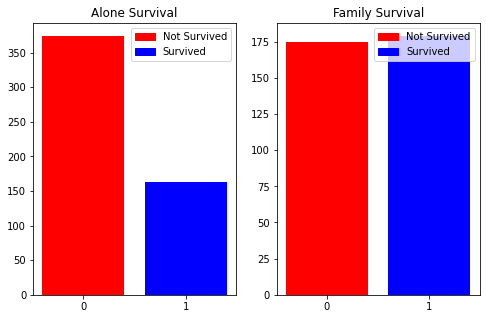

In [65]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(8,5))
ax1.bar(list(('0','1')),alone.value_counts().sort_index(),color=['Red','Blue'])
ax2.bar(list(('0','1')),family.value_counts().sort_index(),color=['Red','Blue'])
ax1.legend(handles,labels)
ax2.legend(handles,labels)
ax1.set_title('Alone Survival')
ax2.set_title('Family Survival')

In [66]:
print(f"Percentage of Alone People Survival {round((sum(alone)/len(alone))*100,1)}%")
print(f"Percentage of Family People Survival {round((sum(family)/len(family))*100,1)}%")

Percentage of Alone People Survival 30.4%
Percentage of Family People Survival 50.6%


In [67]:
df['Embarked'].value_counts()   #S=Southampton,C=Cherbourg,Q=Queenstown

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
S=df.loc[df['Embarked']=='S']['Survived']
C=df.loc[df['Embarked']=='C']['Survived']
Q=df.loc[df['Embarked']=='Q']['Survived']
Q.value_counts()

0    47
1    30
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Queenstown Survival')

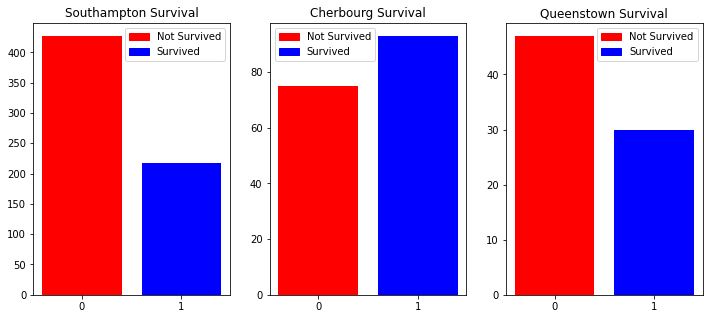

In [72]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(12,5))
ax1.bar(list(('0','1')),S.value_counts().sort_index(),color=['Red','Blue'])
ax2.bar(list(('0','1')),C.value_counts().sort_index(),color=['Red','Blue'])
ax3.bar(list(('0','1')),Q.value_counts().sort_index(),color=['Red','Blue'])
ax1.legend(handles,labels)
ax2.legend(handles,labels)
ax3.legend(handles,labels)
ax1.set_title('Southampton Survival')
ax2.set_title('Cherbourg Survival')
ax3.set_title('Queenstown Survival')

In [73]:
print(f"Percentage of Survival of people travelling to Southampton {round((sum(S)/len(S))*100,1)}%")
print(f"Percentage of Survival of people travelling to Cherbourg {round((sum(C)/len(C))*100,1)}%")
print(f"Percentage of Survival of people travelling to Queenstown {round((sum(Q)/len(Q))*100,1)}%")

Percentage of Survival of people travelling to Southampton 33.7%
Percentage of Survival of people travelling to Cherbourg 55.4%
Percentage of Survival of people travelling to Queenstown 39.0%


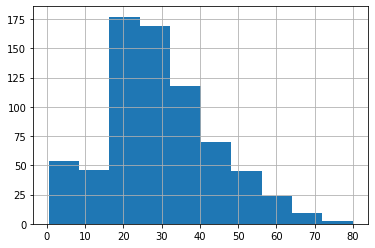

In [74]:
df['Age'].hist()

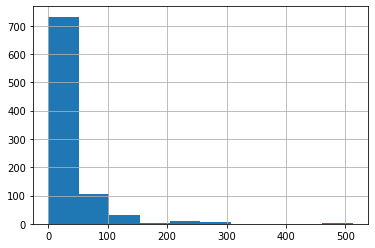

In [75]:
df['Fare'].hist()